In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import ticker as mticker
from netCDF4 import Dataset
from matplotlib.ticker import MaxNLocator
from matplotlib.gridspec import GridSpec
from datetime import datetime

In [21]:
allopc = pd.read_csv(''+'/Data/Data_Extra_thesis/Aerosol/allopc_v2.csv') 

In [22]:
allopc

,Unnamed: 0,timeutmet,OPC1_total_conc_cm3_stp,OPC1_total_conc_cm3_amb,OPC2_total_conc_cm3_stp,irs_alt,irs_lat,irs_lon,ps,ts,OPC2_total_conc_cm3_amb
0,0,2021-06-24 11:58:59,NaN,0.000000,NaN,634.31,48.082401,11.284481,953.24,294.33,0.000000
1,1,2021-06-24 11:59:00,NaN,0.000000,NaN,637.42,48.082931,11.285209,949.52,293.68,0.000000
2,2,2021-06-24 11:59:01,NaN,0.000000,NaN,642.64,48.083471,11.285949,948.75,293.52,0.000000
3,3,2021-06-24 11:59:02,NaN,0.000000,NaN,650.54,48.084015,11.286700,947.77,293.42,0.000000
4,4,2021-06-24 11:59:03,NaN,0.000000,NaN,661.78,48.084560,11.287455,946.15,293.21,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
484065,484065,2021-07-29 16:02:00,114.958317,99.095239,7.956862,637.14,48.088645,11.293041,948.64,296.67,6.858896
484066,484066,2021-07-29 16:02:01,119.719533,103.277348,7.764357,634.62,48.088197,11.292418,948.94,296.54,6.698006
484067,484067,2021-07-29 16:02:02,115.710088,99.849062,7.164217,632.56,48.087748,11.291800,949.23,296.54,6.182178
484068,484068,2021-07-29 16:02:03,116.524507,100.553530,8.955271,630.80,48.087300,11.291188,949.47,296.61,7.727852


In [22]:
allopc_v2 = allopc[['timeutmet', 'OPC1_total_conc_cm3_stp', 'OPC1_total_conc_cm3_amb', 'OPC2_total_conc_cm3_stp',
                  'irs_alt', 'irs_lat', 'irs_lon', 'ps', 'ts', 'OPC2_total_conc_cm3_amb']]

In [23]:
allopc_v2.to_csv(''+'/Data/Data_Extra_thesis/Aerosol/allopc_v2.csv')

In [3]:
allopc.index = pd.to_datetime(allopc['timeutmet'])

In [4]:
allopc = allopc.drop(['timeutmet'], axis=1)

In [25]:
emac_path = ''+'/Data/Data_Extra_thesis/EMAC/S4D/'

emac_files = [emac_path + x for x in os.listdir(emac_path)]

In [31]:
dict_time = dict()
dict_lat = dict()
dict_lev = dict()
dict_temp = dict()
dict_N_5 = dict()
dict_N_10 = dict()
dict_N_12 = dict()
dict_N_14 = dict()
dict_N_opc = dict()
dict_N_opc_low = dict()
dict_N_opc_up = dict()
dict_plev = dict()
dict_N_14_avg = dict()
dict_tpres = dict()
for i, file in enumerate(emac_files):
    f = Dataset(file)
    time = pd.to_datetime(f.variables['time'][:].data, unit='D', origin='2013-01-01')
    lat = f.variables['tlat'][:].data
    lev = f.variables['lev'][:].data
    plev = f.variables['press'][:].data*0.01
    tpres = f.variables['tpress'][:].data
    temp = f.variables['temp'][:].data
    N_5 = f.variables['N_5'][:].data*1e-6
    N_10 = f.variables['N_10'][:].data*1e-6
    N_12 = f.variables['N_12'][:].data*1e-6
    N_14 = f.variables['N_14'][:].data*1e-6
    N_opc = f.variables['N_250_3000'][:].data*1e-6
    N_opc_low = f.variables['N_200_3000'][:].data*1e-6
    N_opc_up = f.variables['N_300_3000'][:].data*1e-6
    N_14_avg = np.array([x.mean() for x in N_14])
    
    dict_time.update({i:time})
    dict_lat.update({i:lat})
    dict_lev.update({i:lev})
    dict_plev.update({i:plev})
    dict_tpres.update({i:tpres})
    dict_temp.update({i:temp})
    dict_N_5.update({i:N_5})
    dict_N_10.update({i:N_10})
    dict_N_12.update({i:N_12})
    dict_N_14.update({i:N_14})
    dict_N_opc.update({i:N_opc})
    dict_N_opc_low.update({i:N_opc_low})
    dict_N_opc_up.update({i:N_opc_up})
    dict_N_14_avg.update({i:N_14_avg})

In [34]:
dict_levels = dict()
for j, (p, tp) in enumerate(zip(dict_plev.values(), dict_tpres.values())):
    levels = np.zeros((len(tp), 5))
    for i, pres in enumerate(tp):
        #print(pres)
        level = np.where(abs(pres - p[i]) == min(abs(pres - p[i])))[0][0]
        levels[i, :] = [level-2, level-1, level, level +1, level + 2]
        #print(p[i, int(min(levels[i, :])):int(max(levels[i, :]))+1])
    dict_levels.update({j: levels[:, 1:-1]})

In [35]:
n_emac_l = pd.Series()
n_emac_l5 = pd.Series()
n_emac_l10 = pd.Series()
n_emac_l12 = pd.Series()
n_emac_opc_l = pd.Series()
n_emac_opc_low_l = pd.Series()
n_emac_opc_up_l = pd.Series()
lat_l = list()
plev_l = pd.Series()
temp_l = pd.Series()
for y5, y10, y12, y, o, olow, oup, l, t, p, lev in zip(dict_N_5.values(), dict_N_10.values(), dict_N_12.values(), dict_N_14.values(), dict_N_opc.values(),
                              dict_N_opc_low.values(), dict_N_opc_up.values(), dict_lat.values(), 
                           dict_temp.values(), dict_plev.values(), dict_levels.values()):
    
    param = len(lev[0])
    for i in range(len(y)):
        lat_l = lat_l +[l[i]]*param
    
    new_p = np.zeros((len(p), param))
    new_t = np.zeros((len(p), param))
    new_y = np.zeros((len(p), param))
    new_y5 = np.zeros((len(p), param))
    new_y10 = np.zeros((len(p), param))
    new_y12 = np.zeros((len(p), param))
    new_o = np.zeros((len(p), param))
    new_olow = np.zeros((len(p), param))
    new_oup = np.zeros((len(p), param))
    new_p.fill(-99999)
    new_t.fill(-99999)
    new_y.fill(-99999)
    new_y5.fill(-99999)
    new_y10.fill(-99999)
    new_y12.fill(-99999)
    new_o.fill(-99999)
    new_olow.fill(-99999)
    new_oup.fill(-99999)
    
    for i in range(len(p)):
        diff = min(int(max(lev[i])), 40)+1 - int(min(lev[i])) # corr 12/04/2024 before 41
        if lev[i, param//2] == 0:
            continue
        new_p[i, :diff] = p[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1] # corrected on 26.04.24, before p[i, int(min(lev[i]))-1:min(int(max(lev[i])), 41)]
        new_t[i, :diff] = t[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_y[i, :diff] = y[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_y5[i, :diff] = y5[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_y10[i, :diff] = y10[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_y12[i, :diff] = y12[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_o[i, :diff] = o[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_olow[i, :diff] = olow[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        new_oup[i, :diff] = oup[i, int(min(lev[i])):min(int(max(lev[i])), 41)+1]
        
    new_p = new_p.reshape(len(new_p)*len(new_p[0]))
    new_t = new_t.reshape(len(new_t)*len(new_t[0]))
    new_y = new_y.reshape(len(new_y)*len(new_y[0]))
    new_y5 = new_y5.reshape(len(new_y5)*len(new_y5[0]))
    new_y10 = new_y10.reshape(len(new_y10)*len(new_y10[0]))
    new_y12 = new_y12.reshape(len(new_y12)*len(new_y12[0]))
    new_o = new_o.reshape(len(new_o)*len(new_o[0]))
    new_olow = new_olow.reshape(len(new_olow)*len(new_olow[0]))
    new_oup = new_oup.reshape(len(new_oup)*len(new_oup[0]))
        
    n_emac_l = pd.concat([n_emac_l, pd.Series(new_y)])
    print(n_emac_l)
    n_emac_l5 = pd.concat([n_emac_l5, pd.Series(new_y5)])
    n_emac_l10 = pd.concat([n_emac_l10, pd.Series(new_y10)])
    n_emac_l12 = pd.concat([n_emac_l12, pd.Series(new_y12)])
    n_emac_opc_l = pd.concat([n_emac_opc_l, pd.Series(new_o)])
    n_emac_opc_low_l = pd.concat([n_emac_opc_low_l, pd.Series(new_olow)])
    n_emac_opc_up_l = pd.concat([n_emac_opc_up_l, pd.Series(new_oup)])
    temp_l = pd.concat([temp_l, pd.Series(new_t)])
    plev_l = pd.concat([plev_l, pd.Series(new_p)])   
    
n_emac_lev = pd.DataFrame({'N_5':n_emac_l5.values, 'N_10':n_emac_l10.values, 'N_12':n_emac_l12.values,
                           'N_14':n_emac_l.values, 'N_opc':n_emac_opc_l, 'N_opc_200':n_emac_opc_low_l,
                           'N_opc_300':n_emac_opc_up_l, 'lat':lat_l, 'ts':temp_l.values, 'plev':plev_l})

0      135.038256
1      161.510256
2      176.261952
3       98.019696
4       75.659392
5       78.052088
6      142.676560
7      105.136024
8       87.352752
9      136.335712
10     111.309448
11      97.417320
12     132.102936
13     114.671928
14      98.039080
15     134.484064
16     111.776584
17      96.829664
18    1021.941568
19     969.951744
20     801.125440
21     985.118400
22     918.195840
23     818.147712
24     852.240128
25    1001.913472
26    1028.318720
27     852.585152
28     965.049216
29     993.404416
30     832.565120
31     967.006208
32    1002.493696
33     856.204928
34     963.654016
35    1006.589120
36     848.094528
37     947.686400
38     998.244864
39     911.018432
40     834.943488
41     758.334976
42     940.404992
43     847.713024
44     766.075520
dtype: float64
0       135.038256
1       161.510256
2       176.261952
3        98.019696
4        75.659392
          ...     
67      108.414560
68      145.248944
69      172.724112
70  

C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dela_el\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: DeprecationWarn

In [29]:
n_emac_lev['N_5_stp'] = n_emac_lev.N_5*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)
n_emac_lev['N_10_stp'] = n_emac_lev.N_10*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)
n_emac_lev['N_12_stp'] = n_emac_lev.N_12*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)
n_emac_lev['N_14_stp'] = n_emac_lev.N_14*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)

In [30]:
n_emac_lev['N_opc_stp'] = n_emac_lev.N_opc*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)
n_emac_lev['N_opc200_stp'] = n_emac_lev.N_opc_200*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)
n_emac_lev['N_opc300_stp'] = n_emac_lev.N_opc_300*(1013.25*n_emac_lev.ts)/(n_emac_lev.plev*273.15)

In [11]:
path_cpc = ''+'/Data/Data_Extra_thesis/Aerosol/CPC_data/'

In [12]:
list_cpc = os.listdir(path_cpc)
list_dirs_cpc = [path_cpc + x for x in list_cpc]
print(list_dirs_cpc)

['D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F01_210624a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F02_210625a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F03_210626a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F04_210628a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F05_210629a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F06_210629b_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F07_210701a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F08_210705a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F09_210705b_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F10_210707a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F11_210707b_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F12_210708a_R01.nas', 'D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYS

In [13]:
for i, file in enumerate(list_dirs_cpc):
    print(file)
    with open(file) as f:
        skip_lines = int(f.readline().split('\t')[0])- 2
        data = f.readlines()[skip_lines:]
        data = [item.rstrip() for item in data]
        header = list(data[0].split('\t'))
        data = [x.split('\t') for x in data]
        data = data[1:]
        
    utc = [x[3] for x in data] 
    data = [list(map(float,x[4:])) for x in data]
    
    cpc_df_i = pd.DataFrame(data, columns=header[4:])
    cpc_df_i.index = utc
    
    if i == 0:
        cpc_df = cpc_df_i
        
    else:
        cpc_df = pd.concat([cpc_df, cpc_df_i])

D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F01_210624a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F02_210625a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F03_210626a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F04_210628a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F05_210629a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F06_210629b_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F07_210701a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F08_210705a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F09_210705b_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F10_210707a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F11_210707b_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F12_210708a_R01.nas
D:/TUDelft/Repository/Data/Aerosol/CPC_data/AMETYST_CPC_F13_210712a_R01.nas
D:/TUDelft/R

In [14]:
cpc_df.index = pd.to_datetime(cpc_df.index)

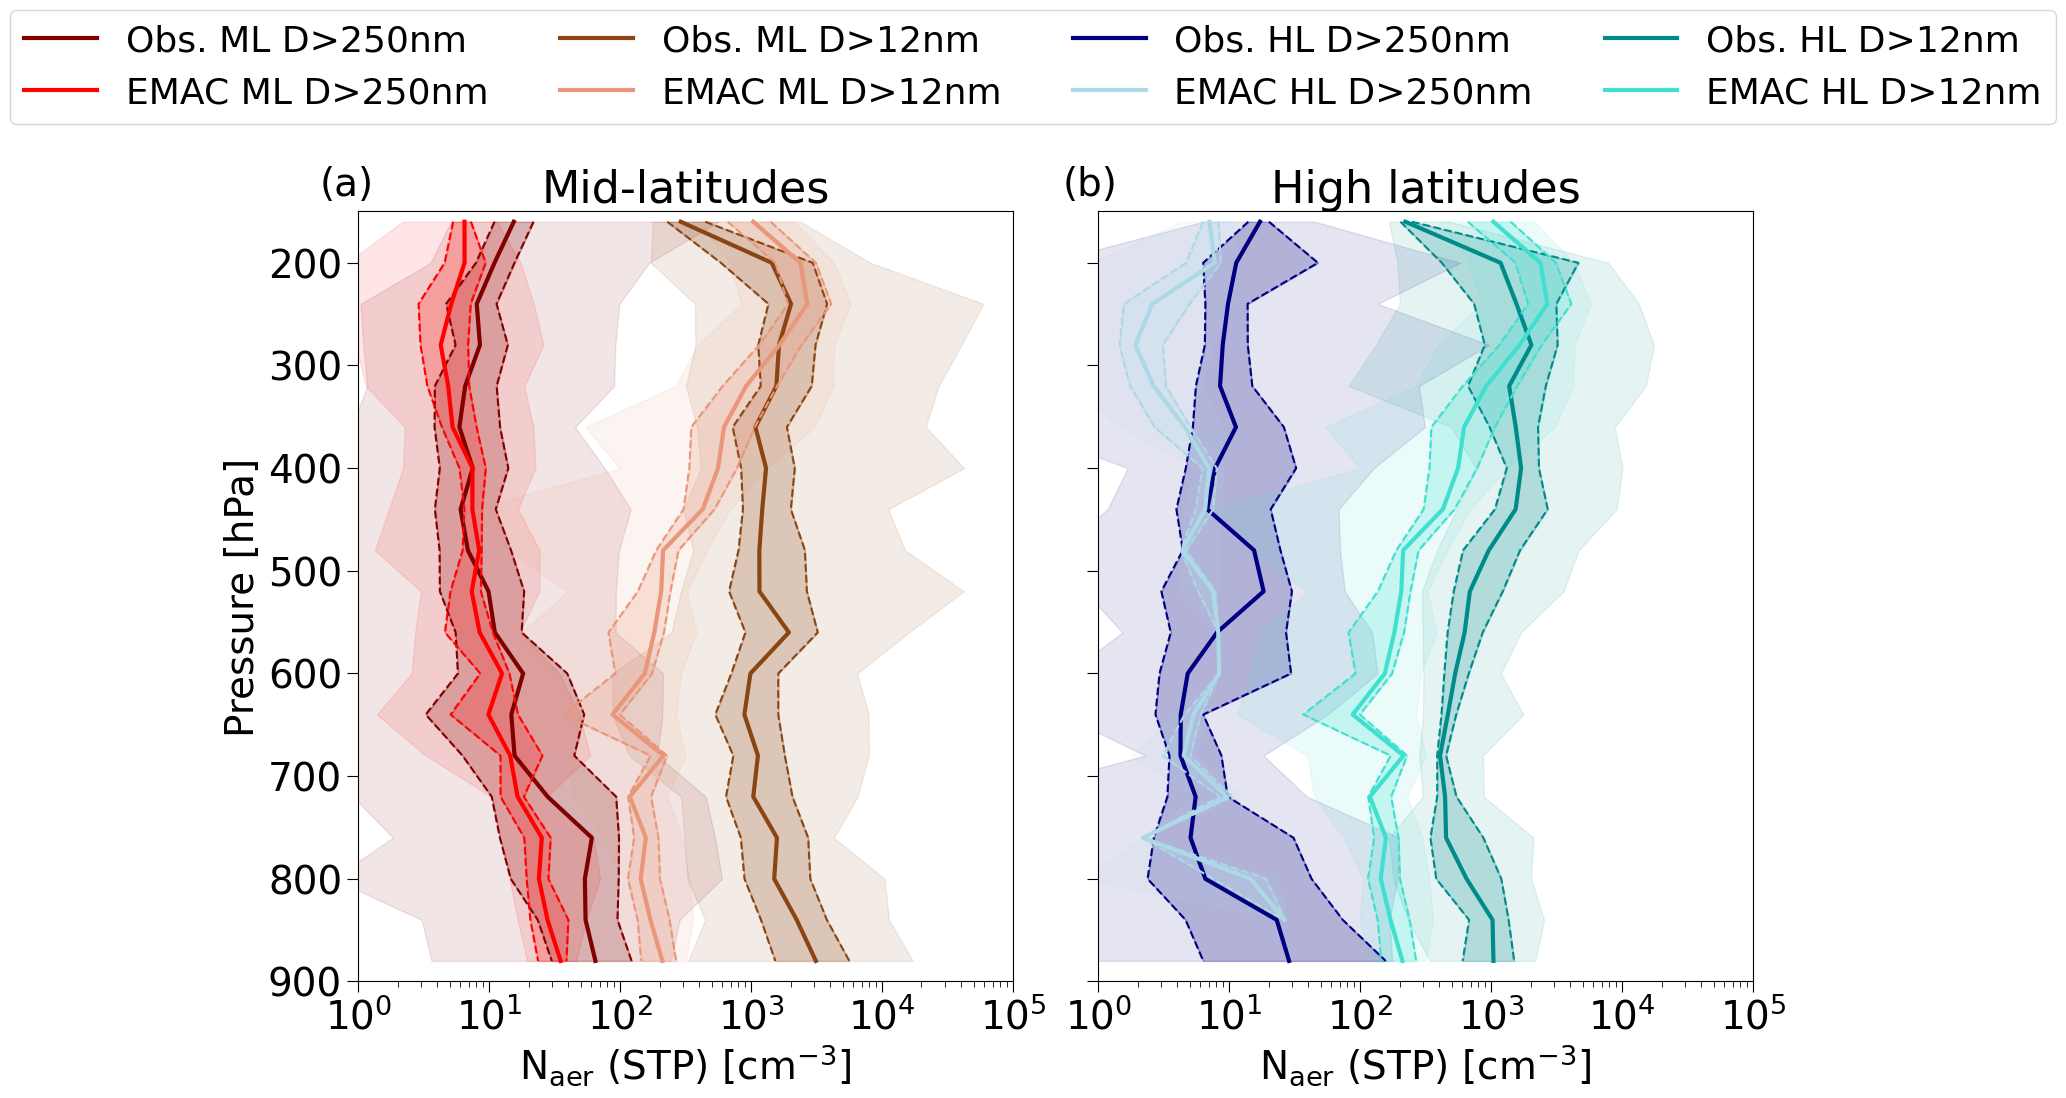

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(18,10))
gs = GridSpec(1,2, wspace=0.13)
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax)

opc_df = allopc

north_emac = n_emac_lev[(n_emac_lev.lat >= 60)&(n_emac_lev.N_opc < 1e10)&(n_emac_lev.N_opc > 0)][['N_opc_stp', 'plev', 'ts']]
south_emac = n_emac_lev[(n_emac_lev.lat < 60)&(n_emac_lev.N_opc < 1e10)&(n_emac_lev.N_opc > 0)][['N_opc_stp', 'plev', 'ts']]
north_m = opc_df[(opc_df.irs_lat >= 60)&(opc_df.OPC1_total_conc_cm3_stp>0)][['OPC1_total_conc_cm3_stp', 'ps', 'ts']]
south_m = opc_df[(opc_df.irs_lat < 60)&(opc_df.OPC1_total_conc_cm3_stp>0)][['OPC1_total_conc_cm3_stp', 'ps', 'ts']]


hbins = np.linspace(140, 900, 20)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [x for x in hmidbins]
width = hbins[1] - hbins[0]

ax.set_ylim(900, 150)

north_emac['plev'] = pd.cut(north_emac['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_emac['plev'] = pd.cut(south_emac['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
north_m['ps'] = pd.cut(north_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_m['ps'] = pd.cut(south_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

col_emac = north_emac.columns[0]
col_obs = north_m.columns[0]

#northed = northed.loc[northed.Ts_is <12750]
#northn = northn.loc[northn.Ts_is <12750]

data_df = pd.DataFrame({'n_e_med':north_emac.groupby('plev')[col_emac].median().values.flatten(), 's_e_med':south_emac.groupby('plev')[col_emac].median().values.flatten(),
                        'n_m_med':north_m.groupby('ps')[col_obs].median().values.flatten(), 's_m_med':south_m.groupby('ps')[col_obs].median().values.flatten(),
                        'n_e_75':north_emac.groupby('plev')[col_emac].quantile(q=0.75).values.flatten(), 's_e_75':south_emac.groupby('plev')[col_emac].quantile(q=0.75).values.flatten(),
                       'n_m_75':north_m.groupby('ps')[col_obs].quantile(q=0.75).values.flatten(), 's_m_75':south_m.groupby('ps')[col_obs].quantile(q=0.75).values.flatten(),
                        'n_e_25':north_emac.groupby('plev')[col_emac].quantile(q=0.25).values.flatten(), 's_e_25':south_emac.groupby('plev')[col_emac].quantile(q=0.25).values.flatten(),
                        'n_m_25':north_m.groupby('ps')[col_obs].quantile(q=0.25).values.flatten(), 's_m_25':south_m.groupby('ps')[col_obs].quantile(q=0.25).values.flatten(),
                       'n_e_100':north_emac.groupby('plev')[col_emac].quantile(q=0.99).values.flatten(), 's_e_100':south_emac.groupby('plev')[col_emac].quantile(q=0.99).values.flatten(),
                       'n_m_100':north_m.groupby('ps')[col_obs].quantile(q=0.99).values.flatten(), 's_m_100':south_m.groupby('ps')[col_obs].quantile(q=0.99).values.flatten(),
                        'n_e_0':north_emac.groupby('plev')[col_emac].quantile(q=0.01).values.flatten(), 's_e_0':south_emac.groupby('plev')[col_emac].quantile(q=0.01).values.flatten(),
                        'n_m_0':north_m.groupby('ps')[col_obs].quantile(q=0.01).values.flatten(), 's_m_0':south_m.groupby('ps')[col_obs].quantile(q=0.01).values.flatten()}, index=hmidbins)

data_df.loc[880].n_e_med = np.nan
data_df.loc[880].n_e_75 = np.nan
data_df.loc[880].n_e_25 = np.nan
data_df.loc[880].n_e_0 = np.nan
data_df.loc[880].n_e_100 = np.nan

#data_df_cpc_ts = pd.DataFrame({'n_e_med':north_emac.groupby('plev').ts.median().values.flatten(), 's_e_med':south_emac.groupby('plev').ts.median().values.flatten(),
#                        'n_m_med':north_m.groupby('ps').ts.median().values.flatten(), 's_m_med':south_m.groupby('ps').ts.median().values.flatten()}, index=hmidbins)

data_df_cpc_ts = pd.DataFrame({'n_e_med':north_emac.groupby('plev').ts.median().values.flatten()-273.15, 's_e_med':south_emac.groupby('plev').ts.median().values.flatten()-273.15,
                        'n_m_med':north_m.groupby('ps').ts.median().values.flatten()-273.15, 's_m_med':south_m.groupby('ps').ts.median().values.flatten()-273.15}, index=hmidbins)


north_emac = n_emac_lev[(n_emac_lev.lat < 60)&(n_emac_lev.N_12_stp < 1e10)&(n_emac_lev.N_12_stp > 0)][['N_12_stp', 'plev']]
south_emac = n_emac_lev[(n_emac_lev.lat < 60)&(n_emac_lev.N_12_stp < 1e10)&(n_emac_lev.N_12_stp > 0)][['N_12_stp', 'plev']]
north_m = cpc_df[(cpc_df.irs_lat >= 60)&(cpc_df.cpc0_conc_cm3_stp>0)][['cpc0_conc_cm3_stp', 'ps']]
south_m = cpc_df[(cpc_df.irs_lat < 60)&(cpc_df.cpc0_conc_cm3_stp>0)][['cpc0_conc_cm3_stp', 'ps']]

col_emac = north_emac.columns[0]
col_obs = north_m.columns[0]

north_emac['plev'] = pd.cut(north_emac['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_emac['plev'] = pd.cut(south_emac['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
north_m['ps'] = pd.cut(north_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_m['ps'] = pd.cut(south_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

data_df_cpc = pd.DataFrame({'n_e_med':north_emac.groupby('plev')[col_emac].median().values.flatten(), 's_e_med':south_emac.groupby('plev')[col_emac].median().values.flatten(),
                        'n_m_med':north_m.groupby('ps')[col_obs].median().values.flatten(), 's_m_med':south_m.groupby('ps')[col_obs].median().values.flatten(),
                        'n_e_75':north_emac.groupby('plev')[col_emac].quantile(q=0.75).values.flatten(), 's_e_75':south_emac.groupby('plev')[col_emac].quantile(q=0.75).values.flatten(),
                       'n_m_75':north_m.groupby('ps')[col_obs].quantile(q=0.75).values.flatten(), 's_m_75':south_m.groupby('ps')[col_obs].quantile(q=0.75).values.flatten(),
                        'n_e_25':north_emac.groupby('plev')[col_emac].quantile(q=0.25).values.flatten(), 's_e_25':south_emac.groupby('plev')[col_emac].quantile(q=0.25).values.flatten(),
                        'n_m_25':north_m.groupby('ps')[col_obs].quantile(q=0.25).values.flatten(), 's_m_25':south_m.groupby('ps')[col_obs].quantile(q=0.25).values.flatten(),
                       'n_e_100':north_emac.groupby('plev')[col_emac].quantile(q=0.99).values.flatten(), 's_e_100':south_emac.groupby('plev')[col_emac].quantile(q=0.99).values.flatten(),
                       'n_m_100':north_m.groupby('ps')[col_obs].quantile(q=0.99).values.flatten(), 's_m_100':south_m.groupby('ps')[col_obs].quantile(q=0.99).values.flatten(),
                        'n_e_0':north_emac.groupby('plev')[col_emac].quantile(q=0.01).values.flatten(), 's_e_0':south_emac.groupby('plev')[col_emac].quantile(q=0.01).values.flatten(),
                        'n_m_0':north_m.groupby('ps')[col_obs].quantile(q=0.01).values.flatten(), 's_m_0':south_m.groupby('ps')[col_obs].quantile(q=0.01).values.flatten()}, index=hmidbins)


ax.set_xlim(1e0, 1e5)
ax2.set_xscale('log')
ax.set_xscale('log')
ax2.set_xlim(1e0, 1e5)
#ax4.set_xlim(1e-3, 1e2)
plt.setp(ax2.get_yticklabels(), visible=False)

ax.set_ylabel(r'Pressure [hPa]', fontsize=28)
ax.set_xlabel(r'$\mathrm{N_{aer} \ (STP)} \ [\mathrm{cm^{-3}}]$', fontsize=28)
ax2.set_xlabel(r'$\mathrm{N_{aer} \ (STP)} \ [\mathrm{cm^{-3}}]$', fontsize=28)
#ax3.set_xlabel(r'Temperature [K]', fontsize=28)

#ax3.legend(fontsize=28)

#ax3.set_xlim(0, 20000)
ax.tick_params(axis='both', which='major', labelsize=28, length=8)
ax2.tick_params(axis='both', which='major', labelsize=28, length=8)
ax.tick_params(axis='x', which='minor', labelsize=28, length=4)
ax2.tick_params(axis='x', which='minor', labelsize=28, length=4)
ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax2.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5])
ax2.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4, 1e5])


ax2.plot(data_df.n_m_med, data_df.index, color='navy', linewidth=3, label='Obs. HL D>250nm')
ax2.plot(data_df.n_m_75, data_df.index, '--', color='navy', linewidth=1.5)
ax2.plot(data_df.n_m_25, data_df.index, '--', color='navy', linewidth=1.5)


ax.plot(data_df.s_m_med, data_df.index, color='maroon', linewidth=3, label='Obs. ML D>250nm')
ax.plot(data_df.s_m_75, data_df.index, '--', color='maroon', linewidth=1.5)
ax.plot(data_df.s_m_25, data_df.index, '--', color='maroon', linewidth=1.5)
ax.fill_betweenx(hmidbins, data_df.s_m_100, data_df.s_m_75, color='maroon', edgecolor='maroon', alpha=0.1)
ax.fill_betweenx(hmidbins, data_df.s_m_25, data_df.s_m_0, color='maroon', edgecolor='maroon', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df.n_m_100, data_df.n_m_75, color='navy', edgecolor='navy', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df.n_m_25, data_df.n_m_0, color='navy', edgecolor='navy', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df.n_m_75, data_df.n_m_25, color='navy', alpha=.3)
ax.fill_betweenx(hmidbins, data_df.s_m_75, data_df.s_m_25, color='maroon', alpha=.3)

ax2.plot(data_df.n_e_med, data_df.index, color='lightblue', linewidth=3, label='EMAC HL D>250nm')
ax2.plot(data_df.n_e_75, data_df.index, '--', color='lightblue', linewidth=1.5)
ax2.plot(data_df.n_e_25, data_df.index, '--', color='lightblue', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df.n_e_100, data_df.n_e_75, color='lightblue', edgecolor='lightblue', alpha=.1, label='1-99 % HL')
ax2.fill_betweenx(hmidbins, data_df.n_e_25, data_df.n_e_0, color='lightblue', edgecolor='lightblue', alpha=.1)
ax.fill_betweenx(hmidbins, data_df.s_e_100, data_df.s_e_75, color='red', edgecolor='red', alpha=0.1, label='1-99 % ML')
ax.fill_betweenx(hmidbins, data_df.s_e_25, data_df.s_e_0, color='red', edgecolor='red', alpha=.1)


ax.plot(data_df.s_e_med, data_df.index, color='red', linewidth=3, label='EMAC ML D>250nm')
ax.plot(data_df.s_e_75, data_df.index, '--', color='red', linewidth=1.5)
ax.plot(data_df.s_e_25, data_df.index, '--', color='red', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df.n_e_75, data_df.n_e_25, color='lightblue', alpha=.3, label='25-75 % HL')
ax.fill_betweenx(hmidbins, data_df.s_e_75, data_df.s_e_25, color='red', alpha=.3, label='25-75 % ML')


### CPC

ax2.plot(data_df_cpc.n_m_med, data_df_cpc.index, color='darkcyan', linewidth=3, label='Obs. HL D>12nm')
ax2.plot(data_df_cpc.n_m_75, data_df_cpc.index, '--', color='darkcyan', linewidth=1.5)
ax2.plot(data_df_cpc.n_m_25, data_df_cpc.index, '--', color='darkcyan', linewidth=1.5)


ax.plot(data_df_cpc.s_m_med, data_df_cpc.index, color='saddlebrown', linewidth=3, label='Obs. ML D>12nm')
ax.plot(data_df_cpc.s_m_75, data_df_cpc.index, '--', color='saddlebrown', linewidth=1.5)
ax.plot(data_df_cpc.s_m_25, data_df_cpc.index, '--', color='saddlebrown', linewidth=1.5)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_100, data_df_cpc.s_m_75, color='saddlebrown', edgecolor='saddlebrown', alpha=0.1)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_25, data_df_cpc.s_m_0, color='saddlebrown', edgecolor='saddlebrown', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.n_m_100, data_df_cpc.n_m_75, color='darkcyan', edgecolor='darkcyan', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.n_m_25, data_df_cpc.n_m_0, color='darkcyan', edgecolor='darkcyan', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.n_m_75, data_df_cpc.n_m_25, color='darkcyan', alpha=.3)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_75, data_df_cpc.s_m_25, color='saddlebrown', alpha=.3)

ax2.plot(data_df_cpc.n_e_med, data_df_cpc.index, color='turquoise', linewidth=3, label='EMAC HL D>12nm')
ax2.plot(data_df_cpc.n_e_75, data_df_cpc.index, '--', color='turquoise', linewidth=1.5)
ax2.plot(data_df_cpc.n_e_25, data_df_cpc.index, '--', color='turquoise', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df_cpc.n_e_100, data_df_cpc.n_e_75, color='turquoise', edgecolor='turquoise', alpha=.1, label='1-99 % HL')
ax2.fill_betweenx(hmidbins, data_df_cpc.n_e_25, data_df_cpc.n_e_0, color='turquoise', edgecolor='turquoise', alpha=.1)
ax.fill_betweenx(hmidbins, data_df_cpc.s_e_100, data_df_cpc.s_e_75, color='darksalmon', edgecolor='darksalmon', alpha=0.1, label='1-99 % ML')
ax.fill_betweenx(hmidbins, data_df_cpc.s_e_25, data_df_cpc.s_e_0, color='darksalmon', edgecolor='darksalmon', alpha=.1)


ax.plot(data_df_cpc.s_e_med, data_df.index, color='darksalmon', linewidth=3, label='EMAC ML D>12nm')
ax.plot(data_df_cpc.s_e_75, data_df.index, '--', color='darksalmon', linewidth=1.5)
ax.plot(data_df_cpc.s_e_25, data_df.index, '--', color='darksalmon', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df_cpc.n_e_75, data_df_cpc.n_e_25, color='turquoise', alpha=.3, label='25-75 % HL')
ax.fill_betweenx(hmidbins, data_df_cpc.s_e_75, data_df_cpc.s_e_25, color='darksalmon', alpha=.3, label='25-75 % ML')


ax.annotate('(a)', xy=(230, 650), xycoords='figure points', fontsize=28)
ax2.annotate('(b)', xy=(765, 650), xycoords='figure points', fontsize=28)
ax.set_title('Mid-latitudes', fontsize=32)
ax2.set_title('High latitudes', fontsize=32)

handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

fig.legend([handles[0], handles[1], handles[2], handles[3], handles2[0], handles2[1], handles2[2], handles2[3]],
           [labels[0], labels[1], labels[2], labels[3], labels2[0], labels2[1], labels2[2], labels2[3]],
           bbox_to_anchor=(0.5,1.1), loc='upper center', fontsize=26, ncol=4)

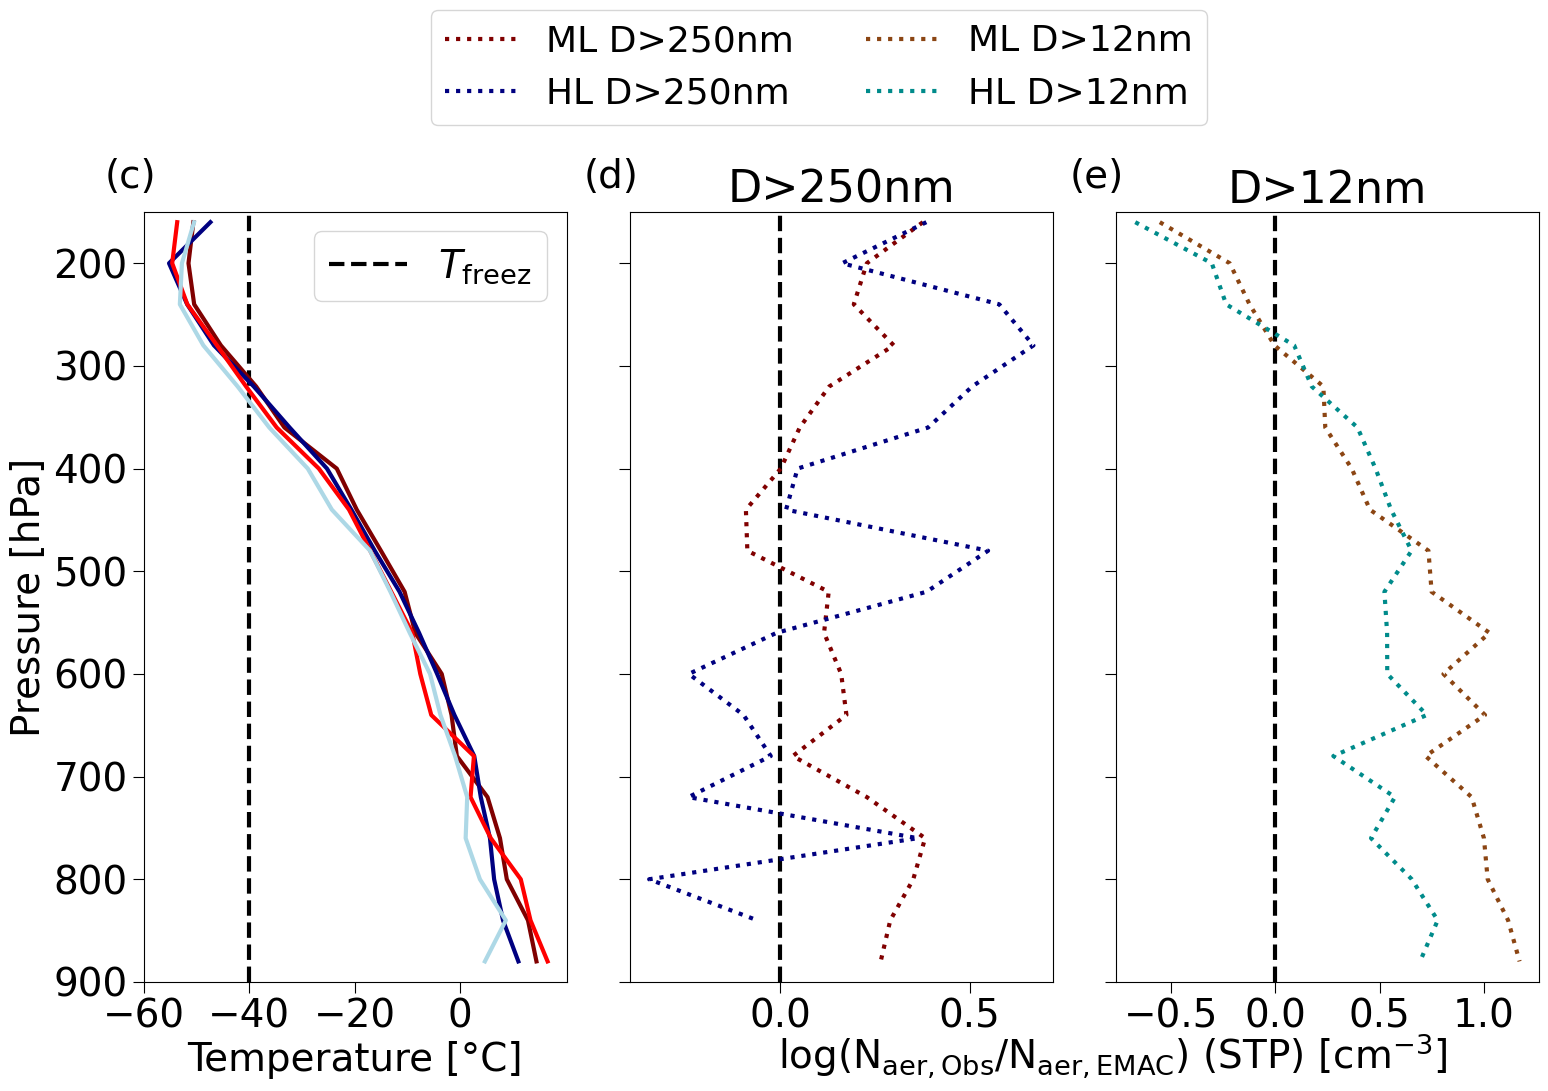

In [16]:
%matplotlib inline

fig = plt.figure(figsize=(18,10))
gs = GridSpec(1,3, wspace=0.15)
ax3 = fig.add_subplot(gs[0, 0])
ax4 = fig.add_subplot(gs[0, 1], sharey=ax3)
ax5 = fig.add_subplot(gs[0, 2], sharey=ax3)


hbins = np.linspace(140, 900, 20)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [x for x in hmidbins]
width = hbins[1] - hbins[0]

ax3.set_ylim(900, 150)

#ax4.set_xlim(1e-3, 1e2)


plt.setp(ax4.get_yticklabels(), visible=False)
plt.setp(ax5.get_yticklabels(), visible=False)

#ax3.set_xlabel(r'Temperature [K]', fontsize=28)
ax3.set_ylabel(r'Pressure [hPa]', fontsize=28)
ax3.set_xlabel(r'Temperature [°C]', fontsize=28)
#ax4.set_xlabel(r'$\mathrm{N_{aer}(Obs. - EMAC) \ [cm^{-3}]}$', fontsize=28)
#ax5.set_xlabel(r'$\mathrm{N_{aer}(Obs. - EMAC) \ [cm^{-3}]}$', fontsize=28)

ax3.plot(data_df_cpc_ts.s_m_med, data_df.index, color='maroon', linewidth=3)
ax3.plot(data_df_cpc_ts.n_m_med, data_df.index, color='navy', linewidth=3)
ax3.plot(data_df_cpc_ts.s_e_med, data_df.index, color='red', linewidth=3)
ax3.plot(data_df_cpc_ts.n_e_med, data_df.index, color='lightblue', linewidth=3)
#ax3.vlines(233, 900, 150, color='black', linewidth=3, linestyle='--', label=r'$T_\mathrm{{freez}}$')
ax3.vlines(-40, 900, 150, color='black', linewidth=3, linestyle='--', label=r'$T_\mathrm{{freez}}$')

ax3.legend(fontsize=28)

#ax3.set_xlim(0, 20000)

ax3.tick_params(axis='both', which='major', labelsize=28, length=8)
ax4.tick_params(axis='both', which='major', labelsize=28, length=8)
ax5.tick_params(axis='both', which='major', labelsize=28, length=8)

ax3.set_xticks([-60, -40, -20, 0])
ax4.set_xticks([-0.5, 0, 0.5])
ax5.set_xticks([-0.5, 0, 0.5, 1])
#ax4.set_xlim(right=100)
#ax5.set_xlim(-400, 100)


ax4.plot(np.log10(data_df.s_m_med/data_df.s_e_med), data_df.index, color='maroon', linewidth=3, label='ML D>250nm', linestyle='dotted')
ax4.plot(np.log10(data_df.n_m_med/data_df.n_e_med), data_df.index, color='navy', linewidth=3, label='HL D>250nm', linestyle='dotted')
ax4.vlines(0, 900, 150, color='black', linewidth=3, linestyle='--')

### CPC

ax5.plot(np.log10(data_df_cpc.s_m_med/data_df_cpc.s_e_med), data_df_cpc.index, color='saddlebrown', linewidth=3, label='ML D>12nm', linestyle='dotted')
ax5.plot(np.log10(data_df_cpc.n_m_med/data_df_cpc.n_e_med), data_df_cpc.index, color='darkcyan', linewidth=3, label='HL D>12nm', linestyle='dotted')
ax5.vlines(0, 900, 150, color='black', linewidth=3, linestyle='--')

ax3.annotate('(c)', xy=(75, 650), xycoords='figure points', fontsize=28)
ax4.annotate('(d)', xy=(420, 650), xycoords='figure points', fontsize=28)
ax5.annotate('(e)', xy=(770, 650), xycoords='figure points', fontsize=28)
ax4.annotate(r'$\mathrm{log(N_{aer, Obs}/N_{aer, EMAC}) \ (STP) \ [cm^{-3}]}$', xy=(560, 16), xycoords='figure points', fontsize=28)
#ax4.annotate(r'$\mathrm{N_{aer}(Obs. - EMAC) \ (amb) \ [\%]}$', xy=(500, 10), xycoords='figure points', fontsize=28)
ax4.set_title('D>250nm', fontsize=32)
ax5.set_title('D>12nm', fontsize=32)

handles, labels = ax4.get_legend_handles_labels()
handles2, labels2 = ax5.get_legend_handles_labels()

fig.legend([handles[0], handles[1], handles2[0], handles2[1]],
           [labels[0], labels[1], labels2[0], labels2[1]],
           bbox_to_anchor=(0.5,1.1), loc='upper center', fontsize=26, ncol=2)

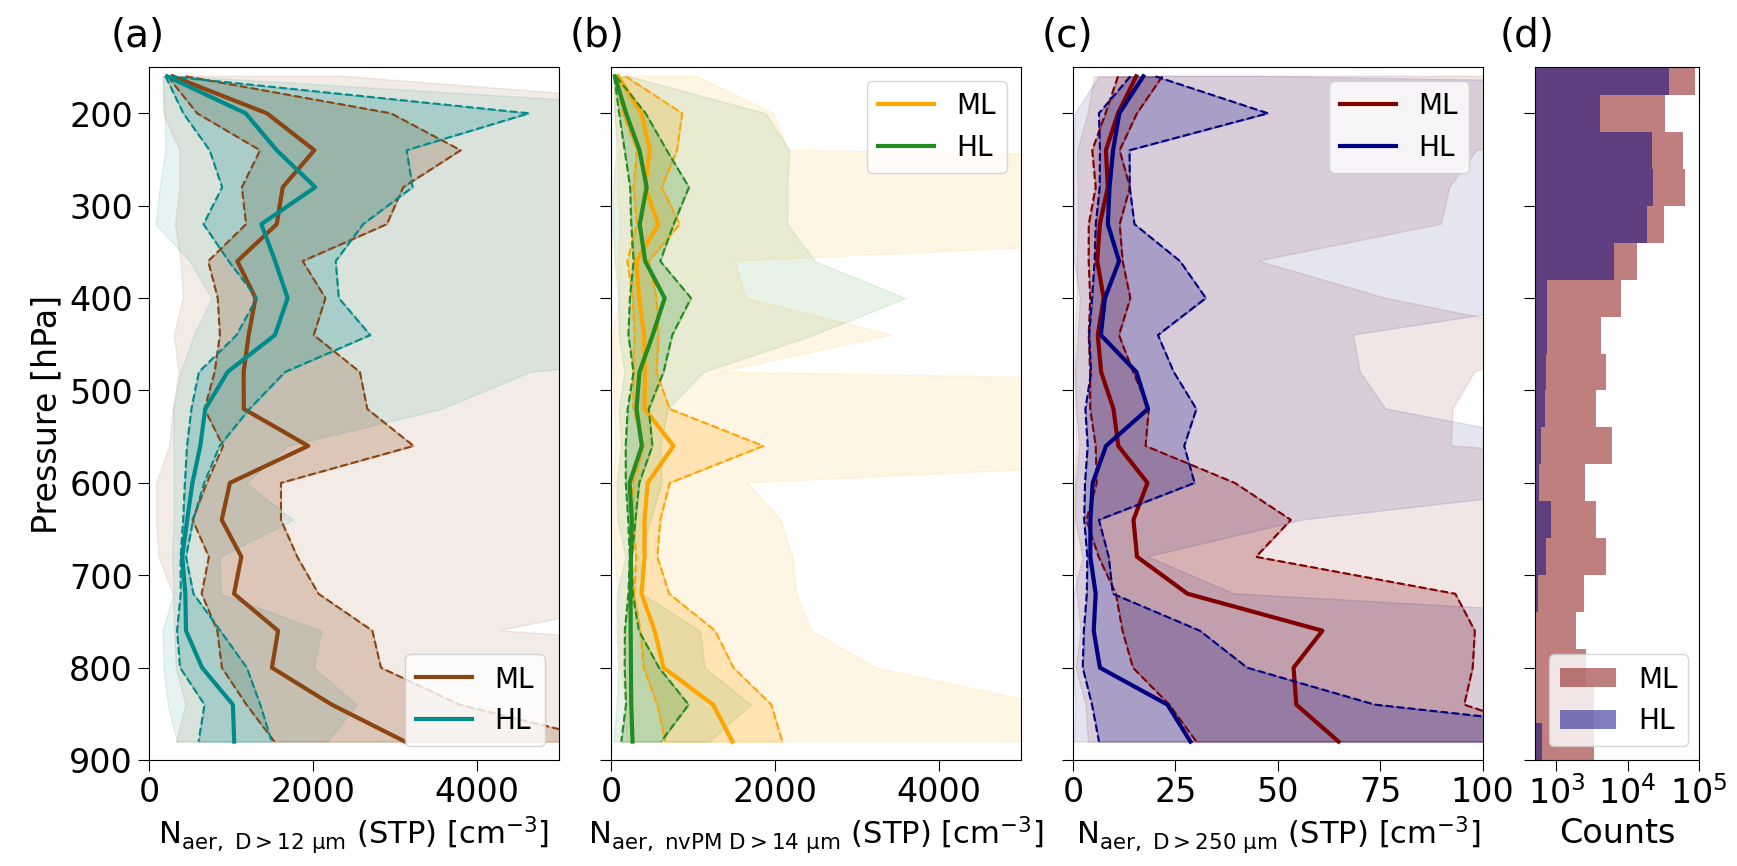

In [17]:
%matplotlib inline

fig = plt.figure(figsize=(20,9))
gs = GridSpec(1,4, wspace=0.15, width_ratios=[1, 1, 1, 0.4])
ax = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1], sharey=ax)
ax3 = fig.add_subplot(gs[0, 2], sharey=ax)
ax4 = fig.add_subplot(gs[0, 3], sharey=ax)

opc_df = allopc

north_m = opc_df[(opc_df.irs_lat >= 60)&(opc_df.OPC1_total_conc_cm3_stp>0)][['OPC1_total_conc_cm3_stp', 'ps']]
south_m = opc_df[(opc_df.irs_lat < 60)&(opc_df.OPC1_total_conc_cm3_stp>0)][['OPC1_total_conc_cm3_stp', 'ps']]


hbins = np.linspace(140, 900, 20)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [x for x in hmidbins]
width = hbins[1] - hbins[0]

ax.set_ylim(900, 150)

north_m['ps'] = pd.cut(north_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_m['ps'] = pd.cut(south_m['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

ax4.hist(south_m.ps, bins=hbins, color='maroon', alpha=0.5, orientation='horizontal', label='ML')
ax4.hist(north_m.ps, bins=hbins, color='navy', alpha=0.5, orientation='horizontal', label='HL')

data_df = pd.DataFrame({'n_m_med':north_m.groupby('ps').median().values.flatten(), 's_m_med':south_m.groupby('ps').median().values.flatten(),
                       'n_m_75':north_m.groupby('ps').quantile(q=0.75).values.flatten(), 's_m_75':south_m.groupby('ps').quantile(q=0.75).values.flatten(),
                        'n_m_25':north_m.groupby('ps').quantile(q=0.25).values.flatten(), 's_m_25':south_m.groupby('ps').quantile(q=0.25).values.flatten(),
                       'n_m_100':north_m.groupby('ps').quantile(q=0.99).values.flatten(), 's_m_100':south_m.groupby('ps').quantile(q=0.99).values.flatten(),
                        'n_m_0':north_m.groupby('ps').quantile(q=0.01).values.flatten(), 's_m_0':south_m.groupby('ps').quantile(q=0.01).values.flatten()}, index=hmidbins)


north_m1 = cpc_df[(cpc_df.irs_lat >= 60)&(cpc_df.cpc0_conc_cm3_stp>0)][['cpc0_conc_cm3_stp', 'ps']]
south_m1 = cpc_df[(cpc_df.irs_lat < 60)&(cpc_df.cpc0_conc_cm3_stp>0)][['cpc0_conc_cm3_stp', 'ps']]

north_m2 = cpc_df[(cpc_df.irs_lat >= 60)&(cpc_df.cpc2_conc_cm3_stp>0)][['cpc2_conc_cm3_stp', 'ps']]
south_m2 = cpc_df[(cpc_df.irs_lat < 60)&(cpc_df.cpc2_conc_cm3_stp>0)][['cpc2_conc_cm3_stp', 'ps']]

north_m1['ps'] = pd.cut(north_m1['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_m1['ps'] = pd.cut(south_m1['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
north_m2['ps'] = pd.cut(north_m2['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
south_m2['ps'] = pd.cut(south_m2['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)


data_df_cpc = pd.DataFrame({'n_m_med':north_m1.groupby('ps').median().values.flatten(), 's_m_med':south_m1.groupby('ps').median().values.flatten(),
                       'n_m_75':north_m1.groupby('ps').quantile(q=0.75).values.flatten(), 's_m_75':south_m1.groupby('ps').quantile(q=0.75).values.flatten(),
                        'n_m_25':north_m1.groupby('ps').quantile(q=0.25).values.flatten(), 's_m_25':south_m1.groupby('ps').quantile(q=0.25).values.flatten(),
                       'n_m_100':north_m1.groupby('ps').quantile(q=0.99).values.flatten(), 's_m_100':south_m1.groupby('ps').quantile(q=0.99).values.flatten(),
                        'n_m_0':north_m1.groupby('ps').quantile(q=0.01).values.flatten(), 's_m_0':south_m1.groupby('ps').quantile(q=0.01).values.flatten(),
                           'n2_m_med':north_m2.groupby('ps').median().values.flatten(), 's2_m_med':south_m2.groupby('ps').median().values.flatten(),
                       'n2_m_75':north_m2.groupby('ps').quantile(q=0.75).values.flatten(), 's2_m_75':south_m2.groupby('ps').quantile(q=0.75).values.flatten(),
                        'n2_m_25':north_m2.groupby('ps').quantile(q=0.25).values.flatten(), 's2_m_25':south_m2.groupby('ps').quantile(q=0.25).values.flatten(),
                       'n2_m_100':north_m2.groupby('ps').quantile(q=0.99).values.flatten(), 's2_m_100':south_m2.groupby('ps').quantile(q=0.99).values.flatten(),
                        'n2_m_0':north_m2.groupby('ps').quantile(q=0.01).values.flatten(), 's2_m_0':south_m2.groupby('ps').quantile(q=0.01).values.flatten()}, index=hmidbins)


ax3.set_xlim(0, 1e2)
ax.set_xlim(0, 5000)
ax2.set_xlim(0, 5000)
ax4.set_xlim(5e2, 1e5)
ax.set_xscale('linear')
ax2.set_xscale('linear')
ax3.set_xscale('linear')
ax4.set_xscale('log')
ax4.set_xticks([1e3, 1e4, 1e5])

ax.set_ylabel(r'Pressure [hPa]', fontsize=24)
ax4.set_xlabel('Counts', fontsize=24)
ax.set_xlabel(r'$\mathrm{N_{aer, \ D>12 \ µm} \ (STP)} \ [\mathrm{cm^{-3}}]$', fontsize=22)
ax2.set_xlabel(r'$\mathrm{N_{aer, \ nvPM \ D>14 \ µm} \ (STP)} \ [\mathrm{cm^{-3}}]$', fontsize=22)
ax3.set_xlabel(r'$\mathrm{N_{aer, \ D>250 \ µm} \ (STP)} \ [\mathrm{cm^{-3}}]$', fontsize=22)

#ax3.set_xlim(0, 20000)
ax.tick_params(axis='both', which='major', labelsize=24, length=8)
#ax.tick_params(axis='x', which='minor', labelsize=24, length=4)
ax2.tick_params(axis='both', which='major', labelsize=24, length=8)
ax3.tick_params(axis='both', which='major', labelsize=24, length=8)
ax4.tick_params(axis='both', which='major', labelsize=24, length=8)
#ax2.tick_params(axis='x', which='minor', labelsize=24, length=4)
#ax.xaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
#ax.set_xticks([1e0, 1e1, 1e2, 1e3, 1e4])
#ax.set_xticks([1e0, 1e1, 1e2])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax4.get_yticklabels(), visible=False)

ax3.plot(data_df.s_m_med, data_df.index, color='maroon', linewidth=3, label='ML')
ax3.plot(data_df.s_m_75, data_df.index, '--', color='maroon', linewidth=1.5)
ax3.plot(data_df.s_m_25, data_df.index, '--', color='maroon', linewidth=1.5)
ax3.fill_betweenx(hmidbins, data_df.s_m_100, data_df.s_m_75, color='maroon', edgecolor='maroon', alpha=0.1)
ax3.fill_betweenx(hmidbins, data_df.s_m_25, data_df.s_m_0, color='maroon', edgecolor='maroon', alpha=.1)
ax3.fill_betweenx(hmidbins, data_df.s_m_75, data_df.s_m_25, color='maroon', alpha=.3)

ax3.plot(data_df.n_m_med, data_df.index, color='navy', linewidth=3, label='HL')
ax3.plot(data_df.n_m_75, data_df.index, '--', color='navy', linewidth=1.5)
ax3.plot(data_df.n_m_25, data_df.index, '--', color='navy', linewidth=1.5)
ax3.fill_betweenx(hmidbins, data_df.n_m_100, data_df.n_m_75, color='navy', edgecolor='navy', alpha=0.1)
ax3.fill_betweenx(hmidbins, data_df.n_m_25, data_df.n_m_0, color='navy', edgecolor='navy', alpha=.1)
ax3.fill_betweenx(hmidbins, data_df.n_m_75, data_df.n_m_25, color='navy', alpha=.3)


### CPC

ax.plot(data_df_cpc.s_m_med, data_df_cpc.index, color='saddlebrown', linewidth=3, label='ML')
ax.plot(data_df_cpc.s_m_75, data_df_cpc.index, '--', color='saddlebrown', linewidth=1.5)
ax.plot(data_df_cpc.s_m_25, data_df_cpc.index, '--', color='saddlebrown', linewidth=1.5)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_100, data_df_cpc.s_m_75, color='saddlebrown', edgecolor='saddlebrown', alpha=0.1)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_25, data_df_cpc.s_m_0, color='saddlebrown', edgecolor='saddlebrown', alpha=.1)
ax.fill_betweenx(hmidbins, data_df_cpc.s_m_75, data_df_cpc.s_m_25, color='saddlebrown', alpha=.3)

ax.plot(data_df_cpc.n_m_med, data_df_cpc.index, color='darkcyan', linewidth=3, label='HL')
ax.plot(data_df_cpc.n_m_75, data_df_cpc.index, '--', color='darkcyan', linewidth=1.5)
ax.plot(data_df_cpc.n_m_25, data_df_cpc.index, '--', color='darkcyan', linewidth=1.5)
ax.fill_betweenx(hmidbins, data_df_cpc.n_m_100, data_df_cpc.n_m_75, color='darkcyan', edgecolor='darkcyan', alpha=0.1)
ax.fill_betweenx(hmidbins, data_df_cpc.n_m_25, data_df_cpc.n_m_0, color='darkcyan', edgecolor='darkcyan', alpha=.1)
ax.fill_betweenx(hmidbins, data_df_cpc.n_m_75, data_df_cpc.n_m_25, color='darkcyan', alpha=.3)

ax2.plot(data_df_cpc.s2_m_med, data_df_cpc.index, color='orange', linewidth=3, label='ML')
ax2.plot(data_df_cpc.s2_m_75, data_df_cpc.index, '--', color='orange', linewidth=1.5)
ax2.plot(data_df_cpc.s2_m_25, data_df_cpc.index, '--', color='orange', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df_cpc.s2_m_100, data_df_cpc.s2_m_75, color='orange', edgecolor='orange', alpha=0.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.s2_m_25, data_df_cpc.s2_m_0, color='orange', edgecolor='orange', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.s2_m_75, data_df_cpc.s2_m_25, color='orange', alpha=.3)

ax2.plot(data_df_cpc.n2_m_med, data_df_cpc.index, color='forestgreen', linewidth=3, label='HL')
ax2.plot(data_df_cpc.n2_m_75, data_df_cpc.index, '--', color='forestgreen', linewidth=1.5)
ax2.plot(data_df_cpc.n2_m_25, data_df_cpc.index, '--', color='forestgreen', linewidth=1.5)
ax2.fill_betweenx(hmidbins, data_df_cpc.n2_m_100, data_df_cpc.n2_m_75, color='forestgreen', edgecolor='forestgreen', alpha=0.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.n2_m_25, data_df_cpc.n2_m_0, color='forestgreen', edgecolor='forestgreen', alpha=.1)
ax2.fill_betweenx(hmidbins, data_df_cpc.n2_m_75, data_df_cpc.n2_m_25, color='forestgreen', alpha=.3)

#ax.annotate('*', xy=(0.38, 0.5), xycoords='figure fraction', fontsize=28)
#ax.annotate('*', xy=(0.475, 0.78), xycoords='figure fraction', fontsize=28)
ax.annotate('(a)', xy=(80, 590), xycoords='figure points', fontsize=28)
ax2.annotate('(b)', xy=(410, 590), xycoords='figure points', fontsize=28)
ax3.annotate('(c)', xy=(750, 590), xycoords='figure points', fontsize=28)
ax4.annotate('(d)', xy=(1080, 590), xycoords='figure points', fontsize=28)

#ax.set_title('Observations', fontsize=30)

#handles, labels = ax.get_legend_handles_labels()

#fig.legend(handles, labels, bbox_to_anchor=(0.5,1.07), loc='upper center', fontsize=24, ncol=3)
ax.legend(fontsize=20)
ax2.legend(fontsize=20)
ax3.legend(fontsize=20)
ax4.legend(fontsize=20)

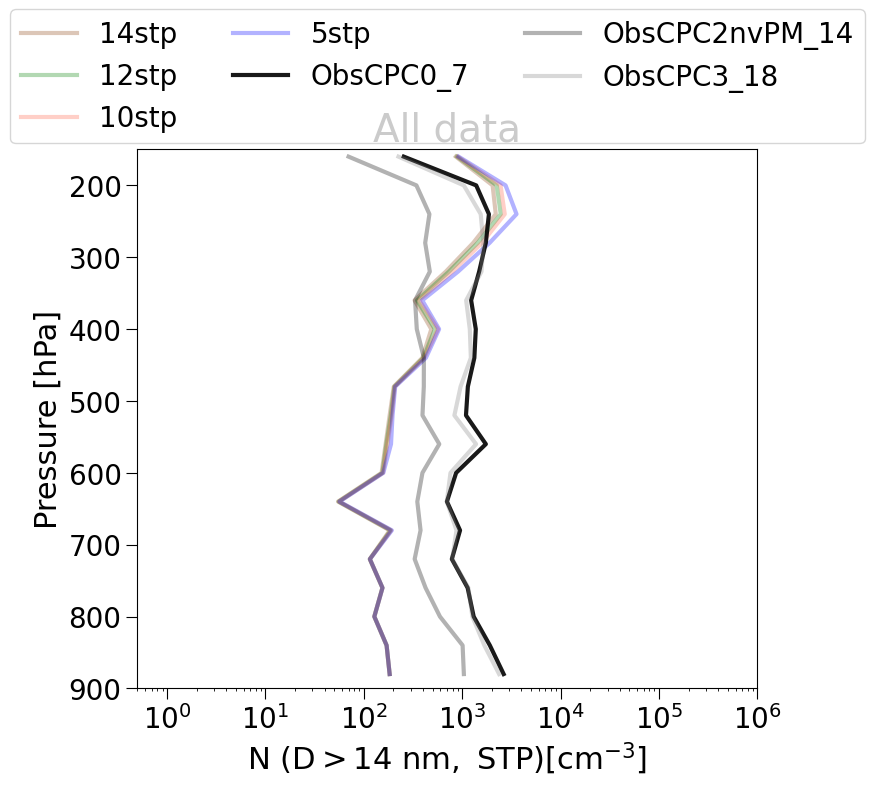

In [18]:
%matplotlib inline

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

hbins = np.linspace(140, 900, 20)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [x for x in hmidbins]
width = hbins[1] - hbins[0]

ax.set_ylim(900, 150)

emac1 = n_emac_lev[(n_emac_lev.N_14 < 1e10)&(n_emac_lev.N_14 > 0)][['N_14', 'plev']]
emac2 = n_emac_lev[(n_emac_lev.N_14_stp < 1e10)&(n_emac_lev.N_14_stp > 0)][['N_14_stp', 'plev']]
emac3 = n_emac_lev[(n_emac_lev.N_12 < 1e10)&(n_emac_lev.N_12 > 0)][['N_12', 'plev']]
emac4 = n_emac_lev[(n_emac_lev.N_12_stp < 1e10)&(n_emac_lev.N_12_stp > 0)][['N_12_stp', 'plev']]
emac5 = n_emac_lev[(n_emac_lev.N_10 < 1e10)&(n_emac_lev.N_10 > 0)][['N_10', 'plev']]
emac6 = n_emac_lev[(n_emac_lev.N_10_stp < 1e10)&(n_emac_lev.N_10_stp > 0)][['N_10_stp', 'plev']]
emac7 = n_emac_lev[(n_emac_lev.N_5 < 1e10)&(n_emac_lev.N_5 > 0)][['N_5', 'plev']]
emac8 = n_emac_lev[(n_emac_lev.N_5_stp < 1e10)&(n_emac_lev.N_5_stp > 0)][['N_5_stp', 'plev']]

obs1 = cpc_df[(cpc_df.cpc0_conc_cm3_stp>0)][['cpc0_conc_cm3_stp', 'ps']]
obs2 = cpc_df[(cpc_df.cpc2_conc_cm3_stp>0)][['cpc2_conc_cm3_stp', 'ps']]
obs3 = cpc_df[(cpc_df.cpc3_conc_cm3_stp>0)][['cpc3_conc_cm3_stp', 'ps']]

emac1['plev'] = pd.cut(emac1['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac2['plev'] = pd.cut(emac2['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac3['plev'] = pd.cut(emac3['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac4['plev'] = pd.cut(emac4['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac5['plev'] = pd.cut(emac5['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac6['plev'] = pd.cut(emac6['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac7['plev'] = pd.cut(emac7['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac8['plev'] = pd.cut(emac8['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

obs1['ps'] = pd.cut(obs1['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
obs2['ps'] = pd.cut(obs2['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
obs3['ps'] = pd.cut(obs3['ps'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

data_df_cpc = pd.DataFrame({'med1':emac1.groupby('plev').median().values.flatten(), 'med2':emac2.groupby('plev').median().values.flatten(),
                        'med3':emac3.groupby('plev').median().values.flatten(), 'med4':emac4.groupby('plev').median().values.flatten(),
                            'med5':emac5.groupby('plev').median().values.flatten(), 'med6':emac6.groupby('plev').median().values.flatten(),
                            'med7':emac7.groupby('plev').median().values.flatten(), 'med8':emac8.groupby('plev').median().values.flatten(),
                           'obs1':obs1.groupby('ps').median().values.flatten(), 'obs2':obs2.groupby('ps').median().values.flatten(),
                           'obs3':obs3.groupby('ps').median().values.flatten()}, index=hmidbins)

ax.set_xlim(5e-1, 1e6)
ax.set_xscale('log')
ax.set_ylabel(r'Pressure [hPa]', fontsize=22)
ax.set_xlabel(r'$\mathrm{N \ (D>14 \ nm, \ STP)} [\mathrm{cm^{-3}}]$', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=20, length=8)

### CPC

#ax.plot(data_df_cpc.med1, data_df_cpc.index, color='darkcyan', linewidth=3, label='14', alpha=.3)

ax.plot(data_df_cpc.med2, data_df_cpc.index, color='saddlebrown', linewidth=3, label='14stp', alpha=.3)

#ax.plot(data_df_cpc.med3, data_df_cpc.index, color='turquoise', linewidth=3, label='12', alpha=.3)

ax.plot(data_df_cpc.med4, data_df_cpc.index, color='green', linewidth=3, label='12stp', alpha=.3)

#ax.plot(data_df_cpc.med5, data_df_cpc.index, color='red', linewidth=3, label='10', alpha=.3)

ax.plot(data_df_cpc.med6, data_df_cpc.index, color='tomato', linewidth=3, label='10stp', alpha=.3)

ax.plot(data_df_cpc.med8, data_df_cpc.index, color='blue', linewidth=3, label='5stp', alpha=.3)

ax.plot(data_df_cpc.obs1, data_df_cpc.index, color='black', linewidth=3, label='ObsCPC0_7', alpha=.9)
ax.plot(data_df_cpc.obs2, data_df_cpc.index, color='black', linewidth=3, label='ObsCPC2nvPM_14', alpha=.3)
ax.plot(data_df_cpc.obs3, data_df_cpc.index, color='gray', linewidth=3, label='ObsCPC3_18', alpha=.3)

ax.set_title('All data', fontsize=28)

handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,
           bbox_to_anchor=(0.5,1.10), loc='upper center', fontsize=20, ncol=3)

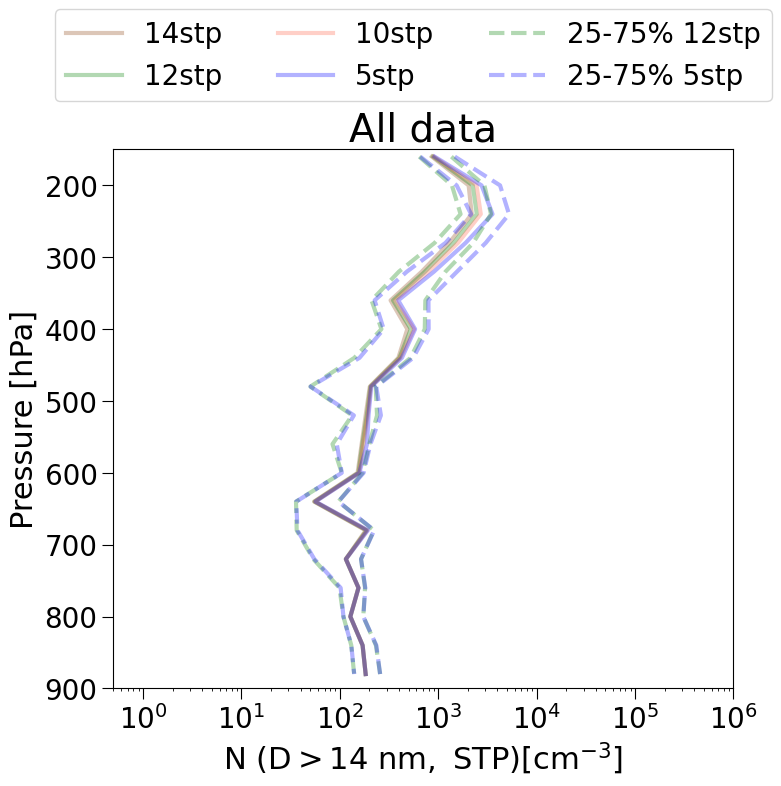

In [19]:
%matplotlib inline

fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)

hbins = np.linspace(140, 900, 20)
hmidbins = (hbins[:-1]+hbins[1:])/2
hmidbins = [x for x in hmidbins]
width = hbins[1] - hbins[0]

ax.set_ylim(900, 150)

emac1 = n_emac_lev[(n_emac_lev.N_14 < 1e10)&(n_emac_lev.N_14 > 0)][['N_14', 'plev']]
emac2 = n_emac_lev[(n_emac_lev.N_14_stp < 1e10)&(n_emac_lev.N_14_stp > 0)][['N_14_stp', 'plev']]
emac3 = n_emac_lev[(n_emac_lev.N_12 < 1e10)&(n_emac_lev.N_12 > 0)][['N_12', 'plev']]
emac4 = n_emac_lev[(n_emac_lev.N_12_stp < 1e10)&(n_emac_lev.N_12_stp > 0)][['N_12_stp', 'plev']]
emac5 = n_emac_lev[(n_emac_lev.N_10 < 1e10)&(n_emac_lev.N_10 > 0)][['N_10', 'plev']]
emac6 = n_emac_lev[(n_emac_lev.N_10_stp < 1e10)&(n_emac_lev.N_10_stp > 0)][['N_10_stp', 'plev']]
emac7 = n_emac_lev[(n_emac_lev.N_5 < 1e10)&(n_emac_lev.N_5 > 0)][['N_5', 'plev']]
emac8 = n_emac_lev[(n_emac_lev.N_5_stp < 1e10)&(n_emac_lev.N_5_stp > 0)][['N_5_stp', 'plev']]

emac1['plev'] = pd.cut(emac1['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac2['plev'] = pd.cut(emac2['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac3['plev'] = pd.cut(emac3['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac4['plev'] = pd.cut(emac4['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac5['plev'] = pd.cut(emac5['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac6['plev'] = pd.cut(emac6['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac7['plev'] = pd.cut(emac7['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)
emac8['plev'] = pd.cut(emac8['plev'],
                   bins=hbins, labels=hmidbins, include_lowest=True)

data_df_cpc = pd.DataFrame({'med1':emac1.groupby('plev').median().values.flatten(), 'med2':emac2.groupby('plev').median().values.flatten(),
                        'med3':emac3.groupby('plev').median().values.flatten(), 'med4':emac4.groupby('plev').median().values.flatten(),
                            'med5':emac5.groupby('plev').median().values.flatten(), 'med6':emac6.groupby('plev').median().values.flatten(),
                            'med7':emac7.groupby('plev').median().values.flatten(), 'med8':emac8.groupby('plev').median().values.flatten(),
                           'per25_1':emac4.groupby('plev').quantile(q=0.25).values.flatten(), 'per25_2':emac8.groupby('plev').quantile(q=0.25).values.flatten(),
                           'per75_1':emac4.groupby('plev').quantile(q=0.75).values.flatten(), 'per75_2':emac8.groupby('plev').quantile(q=0.75).values.flatten()}, index=hmidbins)

ax.set_xlim(5e-1, 1e6)
ax.set_xscale('log')
ax.set_ylabel(r'Pressure [hPa]', fontsize=22)
ax.set_xlabel(r'$\mathrm{N \ (D>14 \ nm, \ STP)} [\mathrm{cm^{-3}}]$', fontsize=22)

ax.tick_params(axis='both', which='major', labelsize=20, length=8)

### CPC

#ax.plot(data_df_cpc.med1, data_df_cpc.index, color='darkcyan', linewidth=3, label='14', alpha=.3)

ax.plot(data_df_cpc.med2, data_df_cpc.index, color='saddlebrown', linewidth=3, label='14stp', alpha=.3)

#ax.plot(data_df_cpc.med3, data_df_cpc.index, color='turquoise', linewidth=3, label='12', alpha=.3)

ax.plot(data_df_cpc.med4, data_df_cpc.index, color='green', linewidth=3, label='12stp', alpha=.3)

#ax.plot(data_df_cpc.med5, data_df_cpc.index, color='red', linewidth=3, label='10', alpha=.3)

ax.plot(data_df_cpc.med6, data_df_cpc.index, color='tomato', linewidth=3, label='10stp', alpha=.3)

ax.plot(data_df_cpc.med8, data_df_cpc.index, color='blue', linewidth=3, label='5stp', alpha=.3)

ax.plot(data_df_cpc.per25_1, data_df_cpc.index, color='green', linewidth=3, label='25-75% 12stp', alpha=.3, linestyle='--')

ax.plot(data_df_cpc.per25_2, data_df_cpc.index, color='blue', linewidth=3, label='25-75% 5stp', alpha=.3, linestyle='--')

ax.plot(data_df_cpc.per75_1, data_df_cpc.index, color='green', linewidth=3, alpha=.3, linestyle='--')

ax.plot(data_df_cpc.per75_2, data_df_cpc.index, color='blue', linewidth=3,  alpha=.3, linestyle='--')


ax.set_title('All data', fontsize=28)

handles, labels = ax.get_legend_handles_labels()

fig.legend(handles, labels,
           bbox_to_anchor=(0.5,1.10), loc='upper center', fontsize=20, ncol=3)